## CS156 Pre-class Work 10.2

**`Gaussian Mixture Models (GMM)` | `EM Algorithm`**

### Library Importation

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.neighbors import KernelDensity

### 1. Fraud: A How-To Guide
In this problem you will use density modeling to try and ensure that there are no statistical irregularities in data that you have generated yourself.

- Download the data containing personal transactions over a period of several years.
- Now build a density model for the number of transactions that occur in a single month.
- Create plots showing the distribution that you've created.
- Draw 10 samples from this density model using `scikit.learn`.

#### a. Load the data

In [3]:
#Load the transaction data
df = pd.read_csv('anonymized.csv')

#Quick snippet of the data
df.head()

,Date,Amount
0,25May2016,54241.35
1,29May2017,54008.83
2,30Jun2017,54008.82
3,05Jan2017,52704.37
4,23Feb2017,52704.36


#### b. Format month

In [4]:
#Convert date to datetime object
df.Date = pd.to_datetime(df.Date,format='%d%b%Y')

#Get the month of the date
df['Month'] = pd.DatetimeIndex(df.Date).month

#Quick snippet
df.head()

,Date,Amount,Month
0,2016-05-25,54241.35,5
1,2017-05-29,54008.83,5
2,2017-06-30,54008.82,6
3,2017-01-05,52704.37,1
4,2017-02-23,52704.36,2


#### c. Calculate the number of transactions per (decimal months)

In [5]:
month_transactions = df.groupby("Month")[['Amount']]\
                       .count()\
                       .rename(columns = {'Amount':'Transactions'})

month_transactions.head()

,Transactions
Month,
1,243
2,195
3,235
4,194
5,221


#### d. Build a density model and draw 10 samples

In [6]:
kde = KernelDensity(kernel='gaussian', bandwidth=5).fit(month_transactions[['Transactions']])
X_plot = np.linspace(150, 300, 10000)[:, np.newaxis]
log_dens = kde.score_samples(X_plot)

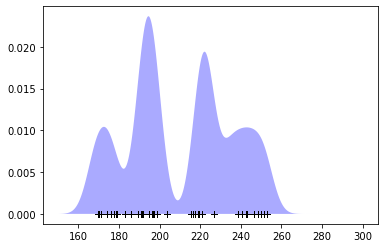

In [7]:
#Plot the distribution
plt.fill(X_plot,np.exp(log_dens),"-k",fc="#AAAAFF")

#Draw 10 samples of 10 points from the data
for _ in range(10):
    new_data = kde.sample(44, random_state=0)
    plt.plot(new_data,np.zeros(len(new_data)),'+', color='black')

plt.show()

### 2. Clustering Survey Data
In this problem you will use expectation maximization (EM) on survey data. For the statistical model that we wish to fit, we will assume that everyone comes from one of four clusters.

- Download the following Python script which generates (synthetic) responses to a binary questionnaire.
- Use the script to generate an example dataset.
- Download the following Python script which you will have to edit and finish so that it can infer which person belonged to which cluster. In particular you will need to:
- Estimate the probability of a person belonging to a particular cluster.
- Estimate the maximum likelihood parameters for the biases. This is the probability that a person from a particular cluster will answer true to a particular question.

In [106]:
import numpy as np

p_cluster = [0.4, 0.3, 0.15, 0.15]

n_questions = 20
n_people = 1000
n_clusters = len(p_cluster)

biases = np.random.beta(0.75, 0.75, size=(n_questions, n_clusters))
people = np.random.choice(range(n_clusters), size=n_people, p=p_cluster)

answers = np.zeros((n_people, n_questions), dtype=bool)

for a in range(n_people):
    cluster = people[a]
    answers[a, :] = np.random.rand(n_questions) < biases[:, cluster]

print(people)

np.savetxt("questionnaire.csv", answers, delimiter=",", fmt="%d")
np.savetxt("questionnaire_answers.csv", people, delimiter=",", fmt="%d")
np.savetxt("questionnaire_biases.csv", biases, delimiter=",", fmt="%.3f")

[0 0 0 1 2 0 0 1 2 0 0 2 0 0 0 1 1 0 2 0 1 3 0 0 0 0 1 0 0 1 1 1 0 1 1 2 1
 0 0 0 2 1 1 1 0 0 2 2 2 0 0 0 0 0 0 0 1 0 0 0 0 3 3 0 2 1 0 0 3 0 1 3 0 0
 1 0 0 0 1 0 0 1 1 0 3 0 0 0 2 0 0 0 2 1 0 3 0 0 2 3 0 0 3 0 0 1 1 3 1 0 1
 3 1 0 0 1 1 3 0 0 0 1 0 3 0 1 2 1 1 0 1 1 1 1 0 2 0 0 1 1 0 3 1 2 1 0 3 0
 1 0 2 0 1 1 1 2 1 1 0 1 3 1 1 0 0 3 1 0 3 0 1 3 0 2 3 1 0 0 1 0 0 1 3 3 0
 0 0 0 2 1 3 1 2 1 0 2 0 1 0 1 1 3 2 1 0 1 2 1 1 1 0 1 2 1 0 0 1 1 1 0 3 2
 3 2 1 0 1 2 0 2 3 0 1 2 1 1 2 0 1 1 1 3 0 3 1 0 1 2 1 3 3 0 2 1 0 3 0 1 1
 2 1 0 1 0 0 2 2 1 0 1 0 3 0 2 0 0 0 2 1 0 1 2 3 3 0 1 1 1 0 1 1 1 0 0 2 1
 0 1 3 1 1 0 0 3 2 2 3 1 0 1 1 2 2 1 0 0 1 0 0 1 3 3 2 0 2 1 1 0 0 0 3 1 2
 1 0 1 0 2 0 1 1 2 1 3 3 0 0 3 0 3 0 0 0 2 0 3 2 1 1 3 1 3 1 3 2 0 2 3 2 1
 1 2 1 3 1 3 1 0 3 2 0 1 2 0 2 0 1 3 1 0 1 0 0 1 1 3 1 3 1 2 1 2 2 0 0 0 0
 1 2 1 1 1 1 0 2 2 1 1 2 1 0 0 0 0 1 3 0 1 2 3 0 1 0 2 1 3 3 2 0 0 0 2 0 2
 0 1 0 1 0 0 0 0 1 0 2 3 1 3 1 1 0 1 3 3 1 0 0 0 1 1 1 0 0 0 0 0 1 1 3 1 3
 0 0 2 2 0 3 3 0 3 0 0 1 

In [107]:
biases

array([[0.99073579, 0.03513861, 0.55049983, 0.93055684],
       [0.93459305, 0.19135911, 0.99746264, 0.65338241],
       [0.82138385, 0.95184144, 0.03480193, 0.11307743],
       [0.74673069, 0.72456562, 0.58738975, 0.95297833],
       [0.1697598 , 0.60298213, 0.62130777, 0.92220199],
       [0.2065318 , 0.24107512, 0.01069884, 0.22975305],
       [0.63203787, 0.85267804, 0.0220831 , 0.2024862 ],
       [0.17917218, 0.03163119, 0.84048742, 0.25445512],
       [0.253054  , 0.04040545, 0.34102427, 0.93086547],
       [0.07730899, 0.88299269, 0.33498053, 0.44467459],
       [0.56826701, 0.43882351, 0.15531153, 0.65798284],
       [0.141746  , 0.98620433, 0.48655118, 0.53914182],
       [0.57268919, 0.30619348, 0.87552866, 0.04270578],
       [0.65779206, 0.80971681, 0.5037648 , 0.39184496],
       [0.07583613, 0.24515306, 0.9980571 , 0.35153761],
       [0.97309781, 0.57076727, 0.01711893, 0.64816937],
       [0.62315975, 0.29989288, 0.90536535, 0.65439407],
       [0.23026394, 0.70130793,

In [71]:
import numpy as np

answers = np.loadtxt("questionnaire.csv", delimiter=",")
n_people, n_questions = answers.shape
n_clusters = 4

p_clusters = np.asarray([0.25, 0.25, 0.25, 0.25])
biases = np.random.beta(0.75, 0.75, size=(n_questions, n_clusters))


def expectation(answers, biases, p_clusters):
    
    #In this function we create our expectations.
    people = np.zeros((len(answers), len(p_clusters)))
    
    #Iterate through all the people
    for n in range(len(answers)):
        
        #Iterate through all the clusters
        for i in range(n_clusters):
            
            #Responsibility
            people[n,i] = p_clusters[i]* np.prod(np.exp(-0.5*(answers[n] - biases[:,i])**2))
            
    #Membership - normalize the distributions
    people = people / people.sum(axis=1, keepdims=1)
    
    return people


def maximization(answers, people):
    
    # Treating all the data as visible, now infer the parameters for the model.

    #Initialize bias to 0
    biases = np.zeros((n_questions, n_clusters))
    
    for i in range(n_clusters):
        
        likelihoods = np.repeat(people[:,i],20).reshape(answers.shape)
        
        #Calculate cluster contribution to each answer and normalize to get new bias
        biases[:,i] = np.sum(likelihoods * answers, axis=0)/np.sum(answers, axis=0)
     
    return biases


for step in range(10):
    people = expectation(answers, biases, p_clusters)
    biases = maximization(answers, people)

print("Bias on each question per cluster:",'\n',biases,'\n')
print("Each individual's cluster probability",'\n',people,'\n')

Bias on each question per cluster: 
 [[0.11475328 0.46986885 0.10744378 0.30793409]
 [0.08412402 0.37031644 0.07860515 0.46695438]
 [0.05353235 0.25092803 0.04997941 0.64556021]
 [0.06294832 0.29404039 0.0587863  0.58422499]
 [0.05431541 0.24755642 0.05075136 0.64737681]
 [0.09616963 0.45314525 0.08962323 0.3610619 ]
 [0.05102711 0.24034009 0.04763012 0.66100268]
 [0.08867694 0.3716448  0.08297183 0.45670643]
 [0.09781939 0.40231526 0.09155019 0.40831517]
 [0.06551175 0.28329853 0.06126723 0.58992249]
 [0.10015314 0.43036643 0.0935998  0.37588062]
 [0.06957619 0.29805142 0.06511261 0.56725978]
 [0.0592434  0.26308627 0.05540364 0.62226669]
 [0.0508093  0.2282736  0.04750697 0.67341012]
 [0.10743758 0.43330159 0.10061637 0.35864446]
 [0.08400267 0.3719642  0.07847104 0.46556209]
 [0.04447885 0.20098436 0.04159597 0.71294082]
 [0.10798393 0.4480916  0.10104704 0.34287742]
 [0.05897613 0.26712619 0.05507658 0.6188211 ]
 [0.08413454 0.35609377 0.0787088  0.48106289]] 

Each individual's cl

---

In [ ]:
# EM for survey data

import numpy as np
import urllib.request

url = "https://course-resources.minerva.kgi.edu/uploaded_files/mke/rKwePr/questionnaire.csv"
f = urllib.request.urlopen(url)
answers = np.loadtxt(f, delimiter=",")
n_people, n_questions = answers.shape
n_clusters = 4

p_clusters = np.asarray([0.25, 0.25, 0.25, 0.25])
biases = np.random.beta(0.75, 0.75, size=(n_questions, n_clusters))

def expectation(answers, biases, p_clusters):
    # In this function we create our expectations.
    people = np.zeros((n_people, n_clusters))
    log_bias = np.log(biases)
    log_other_bias = np.log1p(-biases)

    for a in range(n_clusters):
        term1 = (answers.T * log_bias[:, a:a + 1]).sum(axis=0)
        term2 = ((1 - answers).T * log_other_bias[:, a:a + 1]).sum(axis=0)
        people[:, a] = np.log(p_clusters[a]) + term1 + term2

    people = people - people.max()
    people = np.exp(people)
    
    # # people = np.exp(answers@np.log(biases+1e-15) + (1-answers)@np.log(1-biases + 1e-15))@np.diag(p_clusters)
    #for i in range(0,n_people):
    #    for j in range(0, n_clusters):
    #        prob_i = np.prod(biases[answers[i,:] == 1,j])*np.prod(1-biases[answers[i,:] == 0,j])
    #         # Using bayes' rule, let's get the probability that class j resulted in this data
    #        people[i,j] = prob_i*p_clusters[j]
    
    #Normalize
    people = people / np.sum(people, axis=1, keepdims=True)
    return people


def maximization(answers, people):
    # Treating all the data as visible, now infer the parameters for the model.
    
    biases = np.zeros((n_questions, n_clusters))
    # for each class, compute the biases on each question
    biases =np.zeros((n_questions, n_clusters))
    
    for a in range(n_clusters):
        temp = people[:, a:a + 1]
        z = temp.sum()
        biases[:, a] = (temp * answers).sum(0) / z

    # Update the cluster probabilities
    sum_clusters = np.sum(people, axis = 0)
    cluster_prob = sum_clusters/np.sum(sum_clusters)
    
    # print(f"cluster priors: {cluster_prob}")
    
    return (biases, cluster_prob)

cluster_vals = p_clusters

for step in range(25):
    people = expectation(answers, biases, p_clusters)
    biases, p_clusters = maximization(answers, people)
    cluster_vals = np.vstack([cluster_vals,p_clusters])

print(biases)
print(p_clusters)
